<a href="https://colab.research.google.com/github/Alsyauqi0422/Scraping-dan-analisis-sentimen-data-twitter-kemenkeu-purbaya/blob/main/Crawl_data_twitter_Analisis_Sentimen_Kemenkeu_Purbaya_MUHAMMAD_AL_SYAUQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv("//content/Kemenkeu_Purbaya.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1975452145995686355,Tue Oct 07 06:44:28 +0000 2025,0,Menteri Keuangan Purbaya Yudhi Sadewa menyamba...,1975452145995686355,https://pbs.twimg.com/media/G2o3Qd5aQAAvVkG.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/197545214599568...,1725561741546004480,NaN
1,1975446344832852277,Tue Oct 07 06:21:25 +0000 2025,0,https://t.co/LjjrHLZJqD 4 pulau yg di-angan2 l...,1975446344832852277,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197544634483285...,1555488754089197568,NaN
2,1975434876460445853,Tue Oct 07 05:35:51 +0000 2025,0,Izinkan DKI Bangun Gedung di Lahan Kemenkeu Pu...,1975434876460445853,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197543487646044...,1578222594,NaN
3,1975429546330792026,Tue Oct 07 05:14:41 +0000 2025,1,Usai pertemuan Gubernur DKI Jakarta Pramono An...,1975429551468482648,NaN,Metro_TV,in,NaN,0,0,0,https://x.com/undefined/status/197542955146848...,57261519,NaN
4,1975426168250900518,Tue Oct 07 05:01:14 +0000 2025,17,Semakin banyak serangan tertuju ke Pak Purbaya...,1975426168250900518,https://pbs.twimg.com/media/G2ofn9pbQAAN2Pv.jpg,NaN,in,NaN,0,3,0,https://x.com/undefined/status/197542616825090...,941458748,NaN


In [26]:
df=df[['full_text','created_at']]
df

,full_text,created_at
0,Menteri Keuangan Purbaya Yudhi Sadewa menyamba...,Tue Oct 07 06:44:28 +0000 2025
1,https://t.co/LjjrHLZJqD 4 pulau yg di-angan2 l...,Tue Oct 07 06:21:25 +0000 2025
2,Izinkan DKI Bangun Gedung di Lahan Kemenkeu Pu...,Tue Oct 07 05:35:51 +0000 2025
3,Usai pertemuan Gubernur DKI Jakarta Pramono An...,Tue Oct 07 05:14:41 +0000 2025
4,Semakin banyak serangan tertuju ke Pak Purbaya...,Tue Oct 07 05:01:14 +0000 2025
...,...,...
354,Sri Mulyani Resmi Digantikan Lengser dari Keme...,Mon Sep 08 11:09:06 +0000 2025
355,Kementerian Keuangan Kementerian Perlindungan ...,Mon Sep 08 10:32:17 +0000 2025
356,Presiden Prabowo Subianto resmi melantik Purba...,Mon Sep 08 09:35:35 +0000 2025
357,Kompas : Anggaran UN Pernah Diblokir Kemenkeu ...,Fri Apr 19 09:49:21 +0000 2013


CLEANING DATA

In [27]:
df.shape

(359, 2)

In [28]:
df=df.drop_duplicates(subset=['full_text'])

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df=df.dropna()

In [31]:
df.isnull().sum()

,0
full_text,0
created_at,0


In [32]:
df.shape

(357, 2)

In [33]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [34]:
df['full_text']=df['full_text'].str.lower()

In [35]:
df

,full_text,created_at
0,menteri keuangan purbaya yudhi sadewa menyamba...,Tue Oct 07 06:44:28 +0000 2025
1,4 pulau yg diangan2 lenyap narik truk berplat ...,Tue Oct 07 06:21:25 +0000 2025
2,izinkan dki bangun gedung di lahan kemenkeu pu...,Tue Oct 07 05:35:51 +0000 2025
3,usai pertemuan gubernur dki jakarta pramono an...,Tue Oct 07 05:14:41 +0000 2025
4,semakin banyak serangan tertuju ke pak purbaya...,Tue Oct 07 05:01:14 +0000 2025
...,...,...
354,sri mulyani resmi digantikan lengser dari keme...,Mon Sep 08 11:09:06 +0000 2025
355,kementerian keuangan kementerian perlindungan ...,Mon Sep 08 10:32:17 +0000 2025
356,presiden prabowo subianto resmi melantik purba...,Mon Sep 08 09:35:35 +0000 2025
357,kompas anggaran un pernah diblokir kemenkeu,Fri Apr 19 09:49:21 +0000 2013


NORMALISASI

In [36]:
# Normalisasi
norm = {
    " yg ": " yang ",
    " tp ": "tetapi",
    " sdh ": "sudah",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    " banget ": " sangat ",
    " jg ": " juga ",
    " tuk ": "untuk",
    " msh ": "masih"
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,created_at
0,menteri keuangan purbaya yudhi sadewa menyamba...,Tue Oct 07 06:44:28 +0000 2025
1,4 pulau yang diangan2 lenyap narik truk berpla...,Tue Oct 07 06:21:25 +0000 2025
2,izinkan dki bangun gedung di lahan kemenkeu pu...,Tue Oct 07 05:35:51 +0000 2025
3,usai pertemuan gubernur dki jakarta pramono an...,Tue Oct 07 05:14:41 +0000 2025
4,semakin banyak serangan tertuju ke pak purbaya...,Tue Oct 07 05:01:14 +0000 2025
...,...,...
354,sri mulyani resmi digantikan lengser dari keme...,Mon Sep 08 11:09:06 +0000 2025
355,kementerian keuangan kementerian perlindungan ...,Mon Sep 08 10:32:17 +0000 2025
356,presiden prabowo subianto resmi melantik purba...,Mon Sep 08 09:35:35 +0000 2025
357,kompas anggaran un pernah diblokir kemenkeu,Fri Apr 19 09:49:21 +0000 2013


In [37]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.6 MB/s eta 0:00:00


In [38]:
# Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

more_stop_words = ["tidak"]

# Dapatkan stopword dan tambahkan custom stopword
stop_word_factory = StopWordRemoverFactory()
stop_words = stop_word_factory.get_stop_words()
stop_words.extend(more_stop_words)

# Buat stopword remover dengan daftar stopword terbaru
stopword_remover = stop_word_factory.create_stop_word_remover()

def stopword(str_text):
    str_text = stopword_remover.remove(str_text)
    return str_text

# Aplikasikan fungsi stopword ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,created_at
0,menteri keuangan purbaya yudhi sadewa menyamba...,Tue Oct 07 06:44:28 +0000 2025
1,4 pulau diangan2 lenyap narik truk berplat bl ...,Tue Oct 07 06:21:25 +0000 2025
2,izinkan dki bangun gedung lahan kemenkeu purba...,Tue Oct 07 05:35:51 +0000 2025
3,usai pertemuan gubernur dki jakarta pramono an...,Tue Oct 07 05:14:41 +0000 2025
4,semakin banyak serangan tertuju pak purbaya se...,Tue Oct 07 05:01:14 +0000 2025


In [39]:
tokenized=df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[menteri, keuangan, purbaya, yudhi, sadewa, me..."
1,"[4, pulau, diangan2, lenyap, narik, truk, berp..."
2,"[izinkan, dki, bangun, gedung, lahan, kemenkeu..."
3,"[usai, pertemuan, gubernur, dki, jakarta, pram..."
4,"[semakin, banyak, serangan, tertuju, pak, purb..."
...,...
354,"[sri, mulyani, resmi, digantikan, lengser, kem..."
355,"[kementerian, keuangan, kementerian, perlindun..."
356,"[presiden, prabowo, subianto, resmi, melantik,..."
357,"[kompas, anggaran, un, pernah, diblokir, kemen..."


In [40]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []

    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)

    d_clean = ' '
    d_clean = " ".join(do)
    print(d_clean)

    return d_clean
tokenized= tokenized.apply(stemming)
tokenized.to_csv("/content/hasilPreprocessingKemenkeu_Purbaya.csv", index=False)



menteri uang purbaya yudhi sadewa sambang balai kota 71025 gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung
4 pulau diangan2 lenyap narik truk berplat bl jadi bk gagal sorot kemendagri krn inflasi skrg geruduk kemenkeu mslh duit gin
izin dki bangun gedung lahan kemenkeu purbaya penting tidak keluar uang
usai temu gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung penuh minta bangun mulai tahun
makin banyak serang tuju pak purbaya moga beliau kuat amanah deh
bobby nasution para gubernur datang kemenkeu menkeu purbaya respons buka pintu diskusi
menteri uang kemenkeu tambah tempat dana perintah perban baca sini ta
pramono ungkap rencana pemprov dki bangun gedung baru kawasan scbd temu menkeu purbaya purbaya aku senang rencana karena kemenkeu 

TRANSLATE

In [41]:
!pip install Translate

In [42]:
data = pd.read_csv("/content/hasilPreprocessingKemenkeu_Purbaya.csv", encoding='latin1')
data.head()

,full_text
0,menteri uang purbaya yudhi sadewa sambang bala...
1,4 pulau diangan2 lenyap narik truk berplat bl ...
2,izin dki bangun gedung lahan kemenkeu purbaya ...
3,usai temu gubernur dki jakarta pramono anung m...
4,makin banyak serang tuju pak purbaya moga beli...


In [43]:
# Langkah 1: Instalasi library yang dibutuhkan
# Ini adalah library standar industri untuk tugas seperti ini
!pip install transformers[sentencepiece] torch pandas
!pip install sacremoses

# Langkah 2: Import library yang diperlukan
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch

# --- PENGATURAN ---
input_file = "hasilPreprocessingKemenkeu_Purbaya.csv"
output_file = "TerjemahanKemenkeu_Purbaya.csv"
kolom_sumber = "full_text" # Kolom yang berisi teks Indonesia
kolom_target = "tweet_english" # Nama kolom untuk hasil terjemahan
batch_size = 16 # Proses 16 baris sekaligus untuk kecepatan
# ------------------

try:
    # Membaca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Jumlah baris: {len(data)}.")

    # Mengambil semua teks dari kolom sumber
    texts_to_translate = data[kolom_sumber].astype(str).tolist()

    # Mempersiapkan model (hanya perlu dilakukan sekali)
    print("\nMempersiapkan model terjemahan (mungkin perlu beberapa saat)...")
    model_name = 'Helsinki-NLP/opus-mt-id-en'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Model siap dan berjalan di: {device}")

    # Proses terjemahan secara efisien dalam batch
    print("\nMemulai proses terjemahan (ini akan jauh lebih cepat)...")
    all_translations = []
    for i in range(0, len(texts_to_translate), batch_size):
        batch = texts_to_translate[i:i + batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        translated_tokens = model.generate(**encoded)
        translations = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)
        all_translations.extend(translations)

    # Menambahkan hasil terjemahan sebagai kolom baru
    data[kolom_target] = all_translations

    # Menyimpan hasil akhir ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! Hasil disimpan di '{output_file}'")
    print("Berikut 5 baris pertama dari hasil akhir:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

File 'hasilPreprocessingKemenkeu_Purbaya.csv' berhasil dibaca. Jumlah baris: 357.

Mempersiapkan model terjemahan (mungkin perlu beberapa saat)...
Model siap dan berjalan di: cuda

Memulai proses terjemahan (ini akan jauh lebih cepat)...

✅ Proses Selesai! Hasil disimpan di 'TerjemahanKemenkeu_Purbaya.csv'
Berikut 5 baris pertama dari hasil akhir:
                                           full_text  \
0  menteri uang purbaya yudhi sadewa sambang bala...   
1  4 pulau diangan2 lenyap narik truk berplat bl ...   
2  izin dki bangun gedung lahan kemenkeu purbaya ...   
3  usai temu gubernur dki jakarta pramono anung m...   
4  makin banyak serang tuju pak purbaya moga beli...   

                                       tweet_english  
0  Minister of Ancient Money, Yudhi Sadem near ci...  
1  The four islands in the sky are gone. The truc...  
2        It's important not to get out of the money.  
3  After meeting the governor of the jakarta pram...  
4  fontcolor=" # FFFF00"the moreattack

In [44]:
# Import library yang dibutuhkan (hanya pandas dan re)
import pandas as pd
import re

# --- PENGATURAN ---
# 1. Nama file input Anda yang sudah diterjemahkan (tapi masih kotor)
input_file = "TerjemahanKemenkeu_Purbaya.csv"

# 2. Nama untuk file output yang akan bersih
output_file = "Terjemahan_Baru_Kemenkeu_Purbaya.csv.csv"

# 3. Nama kolom yang ingin Anda bersihkan
kolom_untuk_dibersihkan = "tweet_english"
# ------------------

# --- Fungsi Pembersih Kode Warna ---
def bersihkan_kode_warna(teks):
    # Cek apakah inputnya adalah string
    if isinstance(teks, str):
        # Hapus pola fontcolor="..." beserta isinya
        teks = re.sub(r'fontcolor="[^"]*"', '', teks, flags=re.IGNORECASE)
        # Hapus sisa kata 'fontcolor' atau kode warna seperti #FFFF00
        teks = re.sub(r'fontcolor|#\s*[A-Fa-f0-9]{6}', '', teks, flags=re.IGNORECASE)
        # Hapus semua tanda kutip ganda
        teks = teks.replace('"', '')
        # Ganti spasi berlebih dengan satu spasi
        teks = re.sub(r'\s+', ' ', teks).strip()
        return teks
    # Kembalikan string kosong jika data bukan teks (misalnya, data kosong/NaN)
    return ""

# --- PROSES UTAMA ---
try:
    # 1. Baca file CSV Anda
    data = pd.read_csv(input_file)
    print(f"File '{input_file}' berhasil dibaca. Memproses {len(data)} baris.")

    # 2. Pastikan kolom yang akan dibersihkan ada di dalam file
    if kolom_untuk_dibersihkan not in data.columns:
        raise ValueError(f"Kolom '{kolom_untuk_dibersihkan}' tidak ditemukan di file. Mohon periksa nama kolom di Pengaturan.")

    # 3. Terapkan fungsi pembersihan pada kolom yang ditentukan
    print(f"Membersihkan kolom '{kolom_untuk_dibersihkan}' dari kode warna...")
    data[kolom_untuk_dibersihkan] = data[kolom_untuk_dibersihkan].apply(bersihkan_kode_warna)
    print("Pembersihan selesai.")

    # 4. Simpan hasilnya ke file CSV baru
    data.to_csv(output_file, index=False)

    print(f"\n✅ Proses Selesai! File yang sudah bersih disimpan di '{output_file}'")
    print("\nBerikut 5 baris pertama dari hasil yang sudah dibersihkan:")
    print(data.head())

except FileNotFoundError:
    print(f"ERROR: File '{input_file}' tidak ditemukan. Pastikan nama file sudah benar.")
except Exception as e:
    print(f"Terjadi error: {e}")

File 'TerjemahanKemenkeu_Purbaya.csv' berhasil dibaca. Memproses 357 baris.
Membersihkan kolom 'tweet_english' dari kode warna...
Pembersihan selesai.

✅ Proses Selesai! File yang sudah bersih disimpan di 'Terjemahan_Baru_Kemenkeu_Purbaya.csv.csv'

Berikut 5 baris pertama dari hasil yang sudah dibersihkan:
                                           full_text  \
0  menteri uang purbaya yudhi sadewa sambang bala...   
1  4 pulau diangan2 lenyap narik truk berplat bl ...   
2  izin dki bangun gedung lahan kemenkeu purbaya ...   
3  usai temu gubernur dki jakarta pramono anung m...   
4  makin banyak serang tuju pak purbaya moga beli...   

                                       tweet_english  
0  Minister of Ancient Money, Yudhi Sadem near ci...  
1  The four islands in the sky are gone. The truc...  
2        It's important not to get out of the money.  
3  After meeting the governor of the jakarta pram...  
4  the moreattacksto . kangya bagaga he isstrong ...  


LABELING

In [45]:
data = pd.read_csv("/content/Terjemahan_Baru_Kemenkeu_Purbaya.csv.csv", index_col=0)

# Reset indeks agar menjadi kolom biasa
data_dengan_nomor = data.reset_index()
data_dengan_nomor

,full_text,tweet_english
0,menteri uang purbaya yudhi sadewa sambang bala...,"Minister of Ancient Money, Yudhi Sadem near ci..."
1,4 pulau diangan2 lenyap narik truk berplat bl ...,The four islands in the sky are gone. The truc...
2,izin dki bangun gedung lahan kemenkeu purbaya ...,It's important not to get out of the money.
3,usai temu gubernur dki jakarta pramono anung m...,After meeting the governor of the jakarta pram...
4,makin banyak serang tuju pak purbaya moga beli...,the moreattacksto . kangya bagaga he isstrong ...
...,...,...
352,sri mulyani resmi ganti lengser kemenkeu sri m...,Sri mulyani officially changed lengser to the ...
353,menteri uang menteri lindung kerja migran indo...,Minister of Money Minister Migrants in Indones...
354,presiden prabowo subianto resmi lantik purbaya...,President of the Prebowo Subianto official int...
355,kompas anggar un pernah blokir kemenkeu,Unpaved fencing compass never blocked the manenu


In [46]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [47]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 144
Netral = 153
Negatif = 60

Total Data : 357


In [49]:
data['klasifikasi'] = status
data

,tweet_english,klasifikasi
full_text,,
menteri uang purbaya yudhi sadewa sambang balai kota 71025 gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung,"Minister of Ancient Money, Yudhi Sadem near ci...",Positif
4 pulau diangan2 lenyap narik truk berplat bl jadi bk gagal sorot kemendagri krn inflasi skrg geruduk kemenkeu mslh duit gin,The four islands in the sky are gone. The truc...,Netral
izin dki bangun gedung lahan kemenkeu purbaya penting tidak keluar uang,It's important not to get out of the money.,Positif
usai temu gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung penuh minta bangun mulai tahun,After meeting the governor of the jakarta pram...,Positif
makin banyak serang tuju pak purbaya moga beliau kuat amanah deh,the moreattacksto . kangya bagaga he isstrong ...,Positif
...,...,...
sri mulyani resmi ganti lengser kemenkeu sri mulyani resmi lengser kursi menteri uang presiden prabowo subianto ganti purbaya yudhi sadewa senin 892025 baca berita lengkap,Sri mulyani officially changed lengser to the ...,Positif
menteri uang menteri lindung kerja migran indonesia menteri koperasi menteri pemuda olahraga beberapa posisi menteri ganti masuk sri mulyani ganti purbaya yudhi sadewa kemenkeu,Minister of Money Minister Migrants in Indones...,Netral
presiden prabowo subianto resmi lantik purbaya yudhi sadewa menteri uang purbaya ganti sri mulyani indrawati posisi sebut gtgt,President of the Prebowo Subianto official int...,Netral


VISUALISASI

In [50]:
# Langkah 1: Instalasi library jika belum ada
!pip install wordcloud

# Langkah 2: Import library
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# LANGKAH PENTING:
# Selalu muat ulang file ASLI untuk memastikan kolom 'full_text' ada.
try:
    data_for_wc = pd.read_csv("/content/hasilPreprocessingFerry_Irwandi.csv")
    print("Data asli untuk WordCloud berhasil dimuat.")

    # Gabungkan semua teks dari kolom 'full_text' menjadi satu string
    all_words = ' '.join([str(tweets) for tweets in data_for_wc['full_text']])

    # Buat dan tampilkan WordCloud
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color='black',
        colormap='Blues_r',
        collocations=False,
        stopwords=STOPWORDS
    ).generate(all_words)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("ERROR: File '/content/hasilPreprocessingKemenkeu_Purbaya.csv' tidak ditemukan. Pastikan file sudah di-upload.")

ERROR: File '/content/hasilPreprocessingKemenkeu_Purbaya.csv' tidak ditemukan. Pastikan file sudah di-upload.


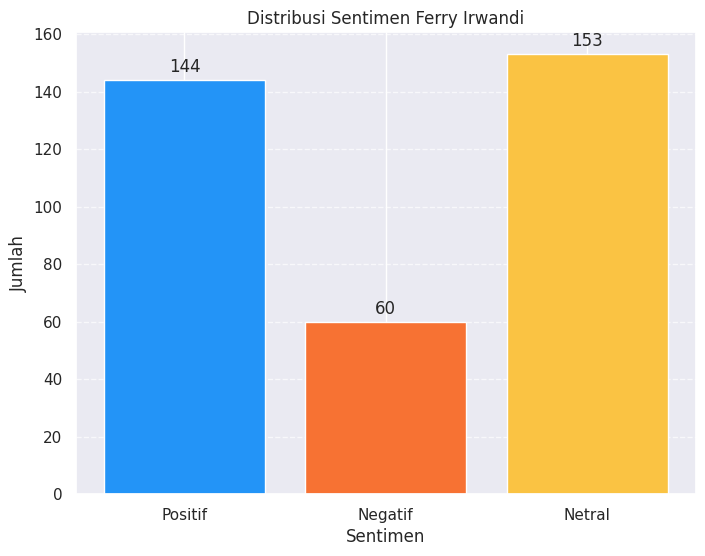

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f77233', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ferry Irwandi")

KLASIFIKASI SENTIMEN

In [52]:
data

,tweet_english,klasifikasi
full_text,,
menteri uang purbaya yudhi sadewa sambang balai kota 71025 gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung,"Minister of Ancient Money, Yudhi Sadem near ci...",Positif
4 pulau diangan2 lenyap narik truk berplat bl jadi bk gagal sorot kemendagri krn inflasi skrg geruduk kemenkeu mslh duit gin,The four islands in the sky are gone. The truc...,Netral
izin dki bangun gedung lahan kemenkeu purbaya penting tidak keluar uang,It's important not to get out of the money.,Positif
usai temu gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung penuh minta bangun mulai tahun,After meeting the governor of the jakarta pram...,Positif
makin banyak serang tuju pak purbaya moga beliau kuat amanah deh,the moreattacksto . kangya bagaga he isstrong ...,Positif
...,...,...
sri mulyani resmi ganti lengser kemenkeu sri mulyani resmi lengser kursi menteri uang presiden prabowo subianto ganti purbaya yudhi sadewa senin 892025 baca berita lengkap,Sri mulyani officially changed lengser to the ...,Positif
menteri uang menteri lindung kerja migran indonesia menteri koperasi menteri pemuda olahraga beberapa posisi menteri ganti masuk sri mulyani ganti purbaya yudhi sadewa kemenkeu,Minister of Money Minister Migrants in Indones...,Netral
presiden prabowo subianto resmi lantik purbaya yudhi sadewa menteri uang purbaya ganti sri mulyani indrawati posisi sebut gtgt,President of the Prebowo Subianto official int...,Netral


In [53]:
dataset = data.reset_index().drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [54]:
import random

# Re-create the dataset_final in the format (text, label) from the 'data' DataFrame
# which already contains 'tweet_english' and 'klasifikasi' columns.
dataset = list(zip(data['tweet_english'], data['klasifikasi']))

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [55]:
from textblob.classifiers import NaiveBayesClassifier
import nltk

nltk.download('punkt_tab')

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Akurasi Test:  0.7619047619047619


In [56]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 122
Netral = 212
Negatif = 23

Total Data : 357


In [57]:
status = pd.DataFrame({"Klasifikasi Bayes": status}, index=data.index)
data['klasifikasi_bayes'] = status

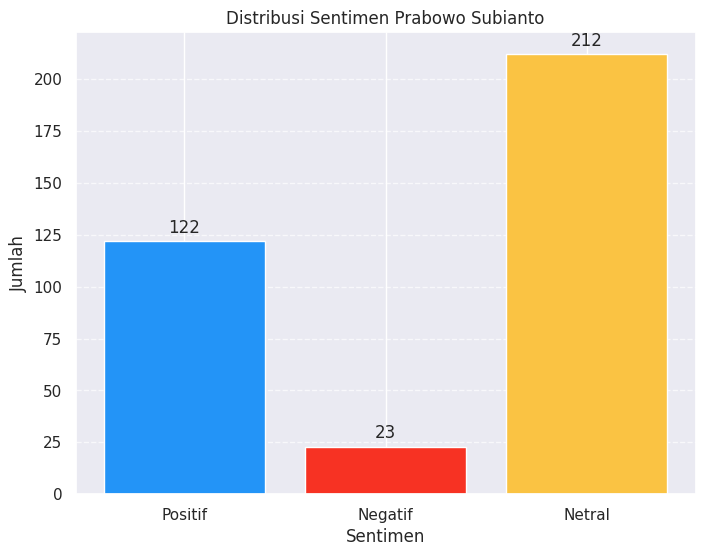

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f73223', '#fac343'])

    # Menambahkan keterangan persentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Prabowo Subianto")

In [59]:
data

,tweet_english,klasifikasi,klasifikasi_bayes
full_text,,,
menteri uang purbaya yudhi sadewa sambang balai kota 71025 gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung,"Minister of Ancient Money, Yudhi Sadem near ci...",Positif,Positif
4 pulau diangan2 lenyap narik truk berplat bl jadi bk gagal sorot kemendagri krn inflasi skrg geruduk kemenkeu mslh duit gin,The four islands in the sky are gone. The truc...,Netral,Netral
izin dki bangun gedung lahan kemenkeu purbaya penting tidak keluar uang,It's important not to get out of the money.,Positif,Positif
usai temu gubernur dki jakarta pramono anung minta tuju kemenkeu soal rencana bangun kantor pusat bank jakarta kawasan lot 1 sudirman central business district menkeu purbaya dukung penuh minta bangun mulai tahun,After meeting the governor of the jakarta pram...,Positif,Positif
makin banyak serang tuju pak purbaya moga beliau kuat amanah deh,the moreattacksto . kangya bagaga he isstrong ...,Positif,Netral
...,...,...,...
sri mulyani resmi ganti lengser kemenkeu sri mulyani resmi lengser kursi menteri uang presiden prabowo subianto ganti purbaya yudhi sadewa senin 892025 baca berita lengkap,Sri mulyani officially changed lengser to the ...,Positif,Positif
menteri uang menteri lindung kerja migran indonesia menteri koperasi menteri pemuda olahraga beberapa posisi menteri ganti masuk sri mulyani ganti purbaya yudhi sadewa kemenkeu,Minister of Money Minister Migrants in Indones...,Netral,Netral
presiden prabowo subianto resmi lantik purbaya yudhi sadewa menteri uang purbaya ganti sri mulyani indrawati posisi sebut gtgt,President of the Prebowo Subianto official int...,Netral,Netral


In [60]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    # Check if the tuple has enough elements before accessing
    if len(n) >= 3: # We need at least 3 elements to access index 1 and 2
        # Compare the original classification (index 1) with the Bayes classification (index 2)
        if n[1] == n[2]:
            # Print relevant information - the translated text and the two classifications
            print(f"Text: {n[0]}\nOriginal Classifier: {n[1]}\nBayes Classifier: {n[2]}\n")
    else:
        print("Tuple does not have enough elements for comparison.")

Text: Minister of Ancient Money, Yudhi Sadem near city hall 71025 governor of Jai jakarta pramono Anung asked to go to the ministry about planning to build a jakarta headquarters office in the lot 1 salirman central business district supports
Original Classifier: Positif
Bayes Classifier: Positif

Text: The four islands in the sky are gone. The truck's plated. It doesn't work.
Original Classifier: Netral
Bayes Classifier: Netral

Text: It's important not to get out of the money.
Original Classifier: Positif
Bayes Classifier: Positif

Text: After meeting the governor of the jakarta pramono anung asked to go to the ministry about plans to build the jakarta headquarters of the lot 1 salurman central business district support full support for getting up from year one.
Original Classifier: Positif
Bayes Classifier: Positif

Text: Bobby nasution the governors came to see the ancients. Answer. Open the discussion door.
Original Classifier: Netral
Bayes Classifier: Netral

Text: The minister's

In [61]:
import csv

# Nama file CSV output
output_csv_file = "evaluasi_klasifikasi.csv"

# Menulis data ke file CSV
with open(output_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Menulis header (opsional, tapi disarankan)
    csv_writer.writerow(['Text', 'Original Classifier', 'Bayes Classifier'])

    # Menulis data
    for row in data_eval:
        # Pastikan setiap baris memiliki jumlah elemen yang sesuai dengan header
        if len(row) >= 3:
            csv_writer.writerow(row)
        else:
            # Tangani kasus jika baris tidak memiliki cukup elemen
            print(f"Skipping row due to insufficient elements: {row}")


print(f"Data evaluasi berhasil diekspor ke '{output_csv_file}'")

Data evaluasi berhasil diekspor ke 'evaluasi_klasifikasi.csv'


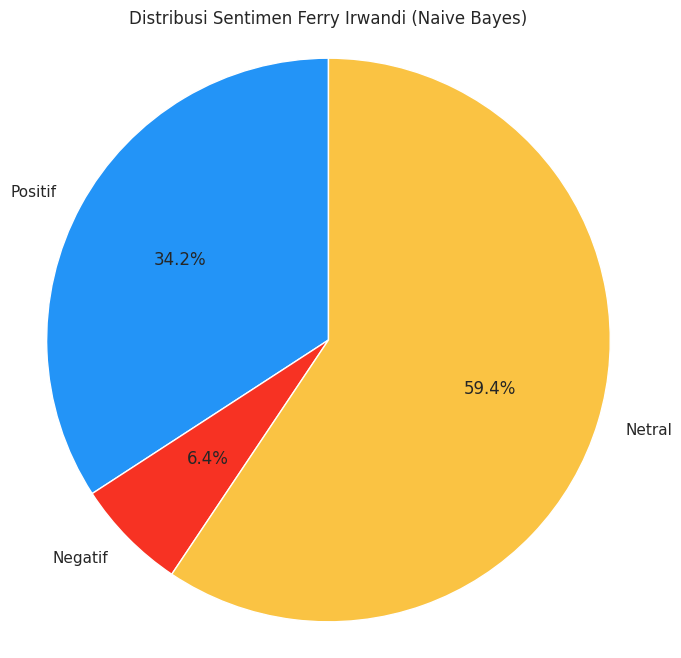

In [62]:
import matplotlib.pyplot as plt

# Data jumlah sentimen (dari hasil analisis sebelumnya)
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral] # Menggunakan variabel dari sel sebelumnya

# Membuat diagram lingkaran (pie chart)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2394f7', '#f73223', '#fac343'])
ax.axis('equal')  # Membuat lingkaran terlihat seperti lingkaran.

plt.title('Distribusi Sentimen Ferry Irwandi (Naive Bayes)')
plt.show()